# Mnist - Ejercicio: Reconocimiento de digitos 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train_raw,y_train_raw),(x_test_raw,y_test_raw) = datasets.mnist.load_data()

In [3]:
#print(x_train_raw[0])

print(x_train_raw.shape,y_train_raw.shape)
print(x_test_raw.shape,y_test_raw.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
y_train_raw[0]

5

In [5]:
# Convirtiendo labes en one-hot 

num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw,num_classes)
y_test  = keras.utils.to_categorical(y_test_raw,num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Visualizacion

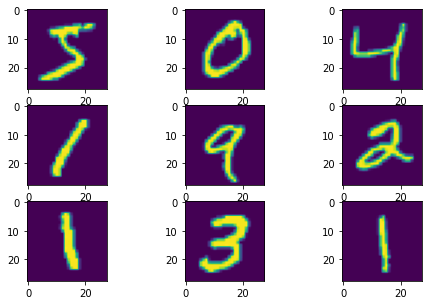

In [6]:
plt.figure(figsize=(8,5))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train_raw[i])
    
plt.show()

In [7]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

In [8]:
# Normalizamos los valores de pixel

x_train = x_train / 255
x_test = x_test / 255 

In [9]:
model = keras.Sequential([
    layers.Dense(512,activation='relu',input_dim=784),
    layers.Dense(256,activation='relu'),
    layers.Dense(124,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,batch_size=128,epochs=10)

Epoch 1/10
469/469 [==============================] - 6s 14ms/step - loss: 0.2283 - accuracy: 0.9329
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0841 - accuracy: 0.9734
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0556 - accuracy: 0.9823
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0396 - accuracy: 0.9869
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0248 - accuracy: 0.9918 0s - los
Epoch 7/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0202 - accuracy: 0.9936 0s - loss: 0.0201 - accuracy: 0.
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 9/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0158 - accuracy: 0.9949
Epoch 10/10
469/469 [============================

In [12]:
score = model.evaluate(x_test,y_test)
print(score)

313/313 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.9777
[0.08705691993236542, 0.9776999950408936]


# Módelo con CNN

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


#Creamos la sequencia de la red
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32,kernel_size=5,strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))


model.add(keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#Capa de dropout para evitar el OVERFITTING
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(units=10,activation='softmax'))


In [17]:
x_train = x_train.reshape(60000,28,28,1)
x_trest = x_test.reshape(10000,28,28,1)
print(x_train.shape)

(60000, 28, 28, 1)


In [18]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1571 - accuracy: 0.9523
Epoch 2/7
1196/1875 [==================>...........] - ETA: 34s - loss: 0.0602 - accuracy: 0.9819- ETA: 38s - loss: 0.0614 -  - ETA: 35s - loss: 0.0602 - accuracy:

In [ ]:
model.evaluate(x_test,y_test)